In [1]:
# Import all of the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
pio.templates.default = "plotly_white"
import datetime
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Create individual columns
Price = [10, 12, 15, 18, 20, 22, 24, 25, 28, 30, 34, 37]
Demand = [200,180,160,140,120,90,60,50,40,30,20,10]
COGS = [5,10,15,20,25,30,35,40,45,50,55,60]
marketing_Spend = [100,120,140,160,180,200,220,240,260,280,300,320]
customer_segments = ['High','Medium','Low']
seasonality = ['Winter','Spring','Summer','Fall']
competitor_price = [10, 12, 15, 18, 20, 22, 24, 25, 28, 30, 34, 37]

In [3]:
# Generate synthetic data
revenue = []

for i in range (1,250):
  price = np.random.randint(10,40)
  demand = np.random.randint(10,200)
  COGS = np.random.randint(5,50)
  Marketing_Spend = np.random.randint(100,320)
  Customer_Segmentation = np.random.choice(customer_segments)
  Seasonality = np.random.choice(seasonality)
  Competitor_Price = np.random.randint(10,40)

  # Generate a random date within a range
  start_date = datetime.date(2020, 1, 1)
  end_date = datetime.date(2023, 12, 31)
  time_between_dates = end_date - start_date
  days_between_dates = time_between_dates.days
  random_number_of_days = np.random.randint(0, days_between_dates)
  Date = start_date + datetime.timedelta(days=random_number_of_days)

  # add all of the columns
  revenue.append([price,demand, COGS, Marketing_Spend,
                  Customer_Segmentation, Seasonality, Competitor_Price, Date])

In [4]:
# Define the column names for the sales dataset
columns = ['Price','Demand','COGS','Marketing_Spend',
           'Customer_Segments','Seasonality','Competitor_Price','Date']

In [5]:
# Create DataFrame
price = pd.DataFrame(revenue, columns=columns)
price.sort_values(by=['Date'], inplace=True)
price.reset_index(drop=True, inplace=True)

# Save to CSV
price.to_csv("sample_price_dataset.csv", index=False)

In [6]:
# Load the sample dataset
# Observe first five rows
price = pd.read_csv("sample_price_dataset.csv")
price.head()

,Price,Demand,COGS,Marketing_Spend,Customer_Segments,Seasonality,Competitor_Price,Date
0,31,57,29,190,Low,Winter,20,2020-01-08
1,10,14,22,165,Low,Spring,35,2020-01-20
2,21,63,14,257,Medium,Summer,30,2020-01-21
3,10,119,12,125,Medium,Summer,39,2020-01-27
4,14,11,46,274,Low,Spring,12,2020-01-29


In [7]:
# Observe last five rows
price.tail()

,Price,Demand,COGS,Marketing_Spend,Customer_Segments,Seasonality,Competitor_Price,Date
244,17,122,45,175,Medium,Spring,10,2023-11-26
245,28,31,12,285,Low,Spring,21,2023-11-28
246,29,184,15,104,Medium,Summer,28,2023-12-07
247,13,103,19,123,High,Winter,25,2023-12-24
248,10,37,23,190,Low,Fall,38,2023-12-26


In [8]:
# Check data type
price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249 entries, 0 to 248
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Price              249 non-null    int64 
 1   Demand             249 non-null    int64 
 2   COGS               249 non-null    int64 
 3   Marketing_Spend    249 non-null    int64 
 4   Customer_Segments  249 non-null    object
 5   Seasonality        249 non-null    object
 6   Competitor_Price   249 non-null    int64 
 7   Date               249 non-null    object
dtypes: int64(5), object(3)
memory usage: 15.7+ KB


In [9]:
# Gather basic statistics
price.describe()

,Price,Demand,COGS,Marketing_Spend,Competitor_Price
count,249.000000,249.000000,249.000000,249.000000,249.000000
mean,24.875502,98.397590,26.951807,207.425703,24.345382
std,8.826998,52.482625,12.978801,61.584943,8.226211
min,10.000000,11.000000,5.000000,101.000000,10.000000
25%,17.000000,58.000000,17.000000,159.000000,18.000000
50%,25.000000,94.000000,27.000000,205.000000,24.000000
75%,33.000000,144.000000,38.000000,261.000000,31.000000
max,39.000000,199.000000,49.000000,319.000000,39.000000


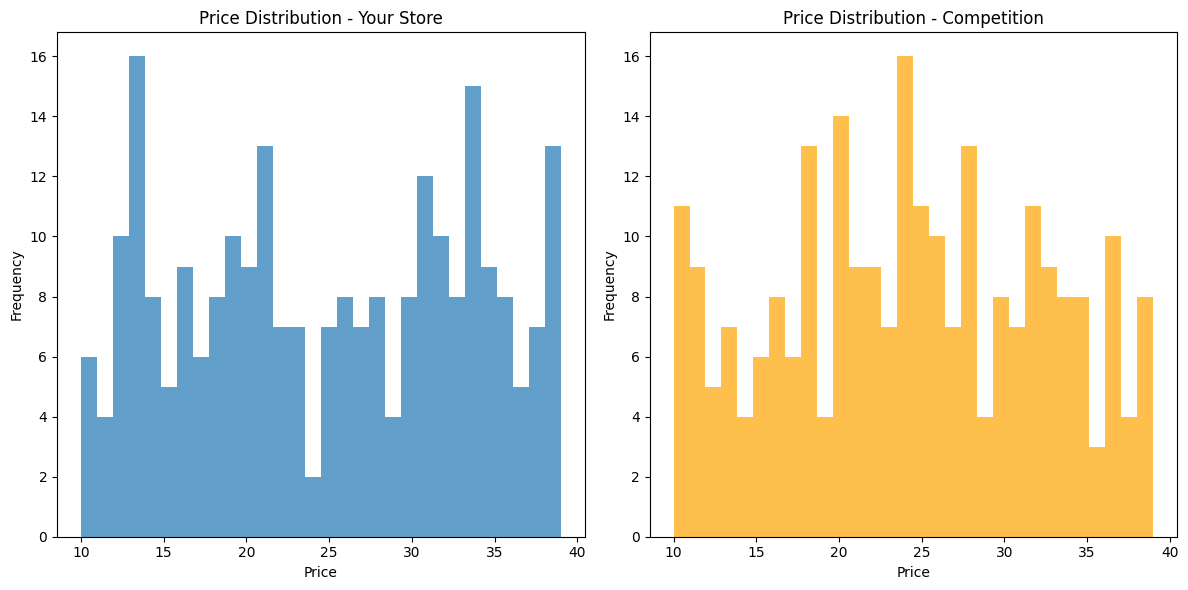

In [10]:
# Create distribution plots and compare between price and competitor price
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.hist(price['Price'], bins=30, alpha=0.7, label='Your Store')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Price Distribution - Your Store')

plt.subplot(1, 2, 2)
plt.hist(price['Competitor_Price'], bins=30, alpha=0.7, color='orange', label='Competition')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Price Distribution - Competition')

plt.tight_layout()
plt.show()

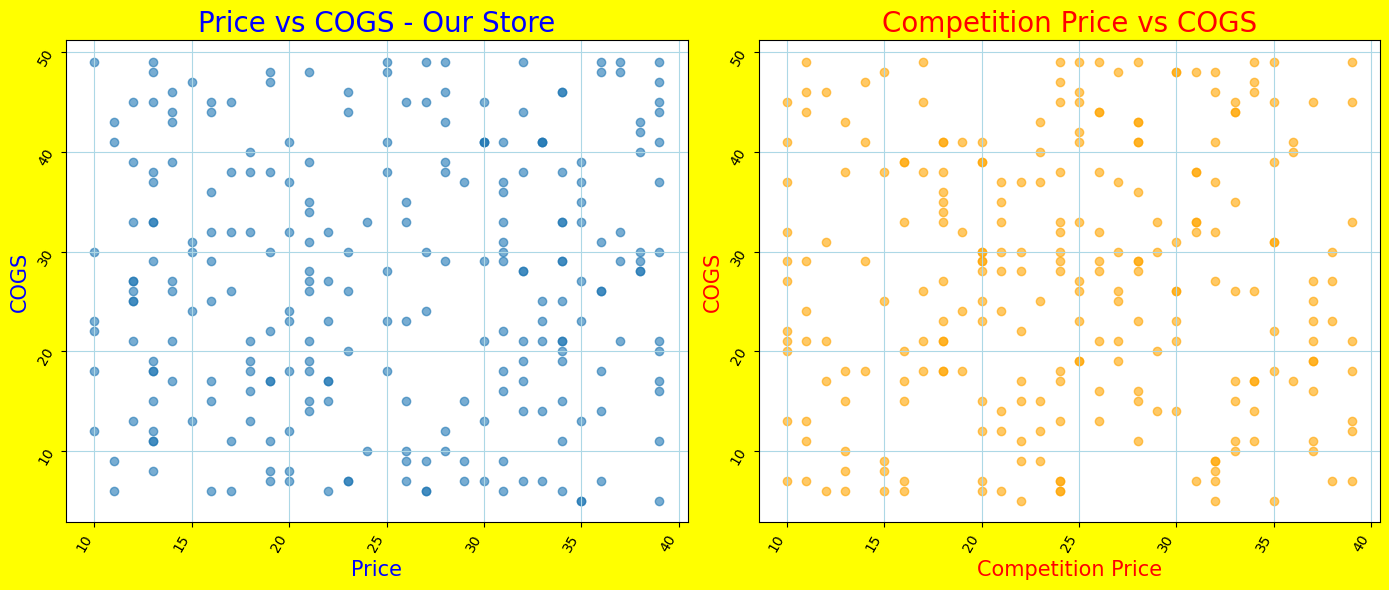

In [11]:
# Create scatter plot between Price and COGS
plt.figure(figsize=(14, 6), facecolor='yellow')

plt.subplot(1, 2, 1)
plt.scatter(price['Price'], price['COGS'], alpha=0.6, label='Your Store')
plt.xlabel('Price', fontsize = 15 ,color = 'blue')
plt.ylabel('COGS', fontsize = 15 ,color = 'blue')
plt.xticks(rotation=60, ha='right')
plt.yticks(rotation=60, ha='right')
plt.tight_layout()
plt.grid(True, color = 'lightblue')
plt.title('Price vs COGS - Our Store', fontsize = 20, color = 'blue')

# Create scatter plot between Competition Price and COGS
plt.subplot(1, 2, 2)
plt.scatter(price['Competitor_Price'], price['COGS'], alpha=0.6, color='orange', label='Competition')
plt.xlabel('Competition Price', fontsize = 15 ,color = 'red')
plt.ylabel('COGS', fontsize = 15 ,color = 'red')
plt.xticks(rotation=60, ha='right')
plt.yticks(rotation=60, ha='right')
plt.title('Competition Price vs COGS', fontsize = 20, color = 'red')
plt.tight_layout()
plt.grid(True, color = 'lightblue')
plt.show()

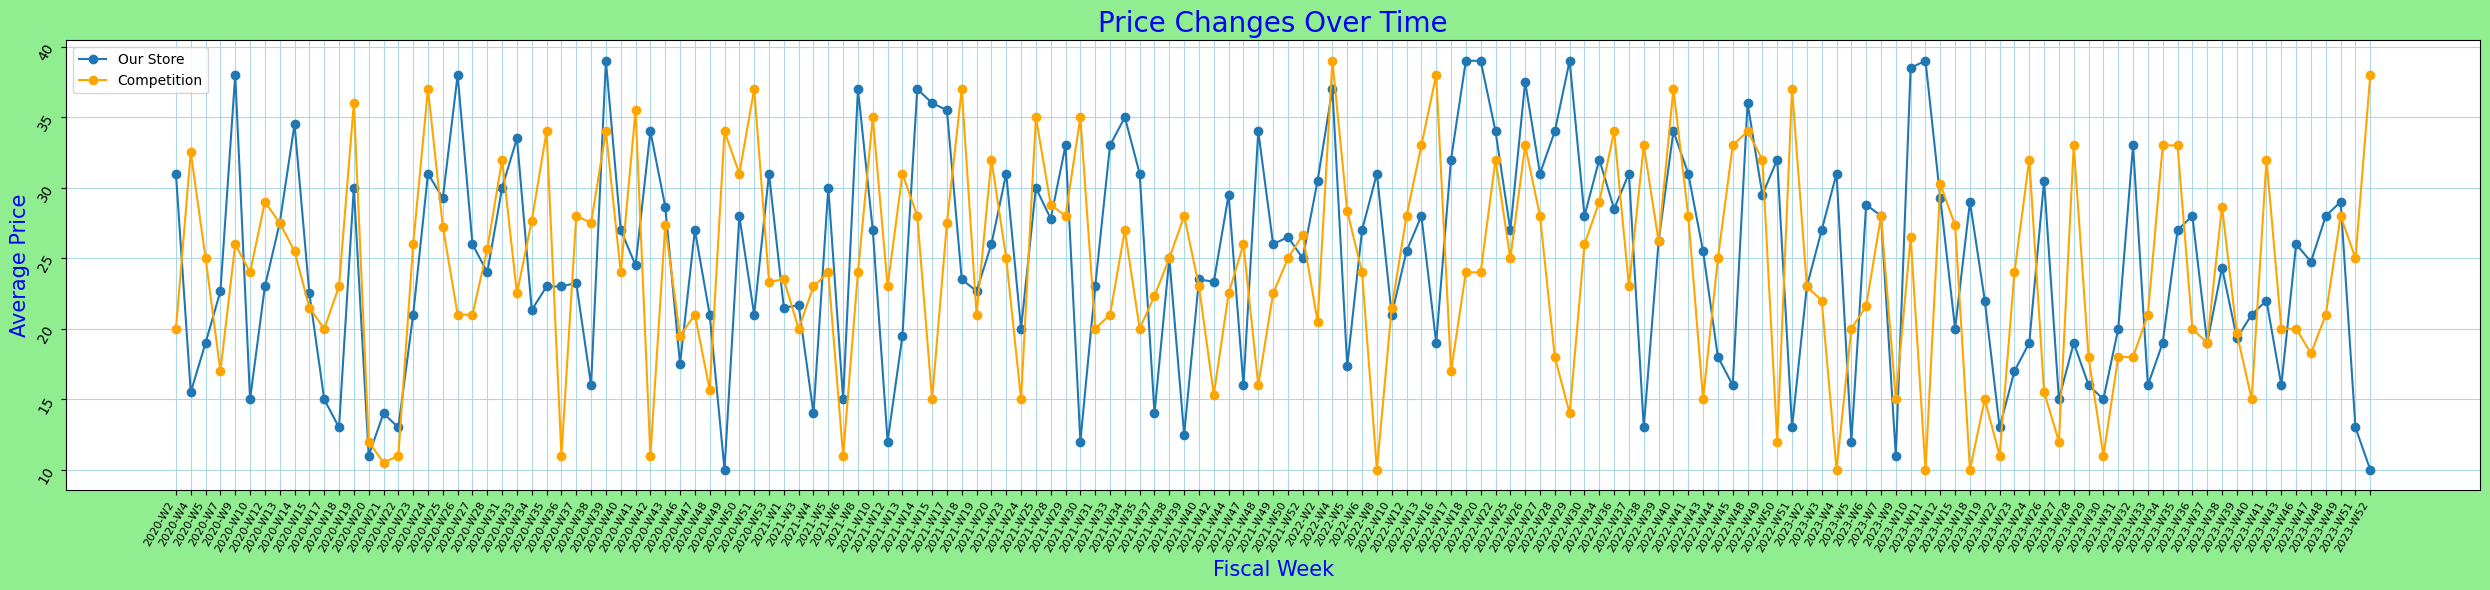

In [12]:
# Convert the 'Date' column to datetime
price['Date'] = pd.to_datetime(price['Date'])

# Extract ISO calendar week and year for proper time series grouping
price['ISO_Week'] = price['Date'].dt.isocalendar().week
price['ISO_Year'] = price['Date'].dt.isocalendar().year

# Group by year and week to avoid mixing weeks across different years
weekly_prices = price.groupby(['ISO_Year', 'ISO_Week']).agg({
    'Price': 'mean',
    'Competitor_Price': 'mean'
}).reset_index()

# Create a label for x-axis combining year and week
weekly_prices['Fiscal_Week_ID'] = weekly_prices['ISO_Year'].astype(str) + '-W' + weekly_prices['ISO_Week'].astype(str)

# Plotting
plt.figure(figsize=(25, 6), facecolor='lightgreen')

plt.plot(weekly_prices['Fiscal_Week_ID'], weekly_prices['Price'], label='Our Store', marker='o')
plt.plot(weekly_prices['Fiscal_Week_ID'], weekly_prices['Competitor_Price'], label='Competition', marker='o', color='orange')

plt.xlabel('Fiscal Week', fontsize=15, color='blue')
plt.ylabel('Average Price', fontsize=15, color='blue')
plt.title('Price Changes Over Time', fontsize=20, color='blue')

plt.xticks(rotation=60, ha='right', fontsize=8)
plt.yticks(rotation=60, ha='right')
plt.tight_layout()
plt.grid(True, color='lightblue')
plt.legend()
plt.show()

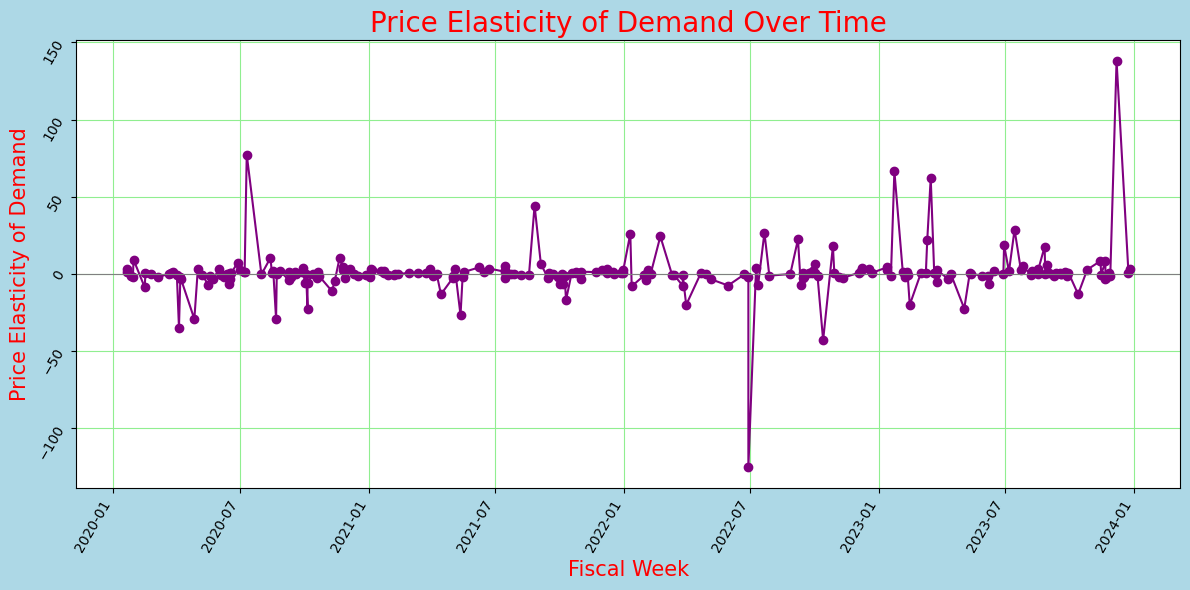

In [13]:
# Create a time series plot of price elasticity of demand over time
price['price_change'] = price['Price'].pct_change()
price['qty_change'] = price['Demand'].pct_change()

price['elasticity'] = price['qty_change'] / price['price_change']

price.replace([float('inf'), -float('inf')], float('nan'), inplace=True)
price.dropna(subset=['elasticity'], inplace=True)

plt.figure(figsize=(12, 6), facecolor='lightblue')
plt.plot(price['Date'], price['elasticity'], marker='o', linestyle='-', color='purple')
plt.axhline(0, color='grey', linewidth=0.8)
plt.xlabel('Fiscal Week', fontsize = 15 ,color = 'red')
plt.ylabel('Price Elasticity of Demand', fontsize = 15 ,color = 'red')
plt.title('Price Elasticity of Demand Over Time', fontsize =20, color = 'red')
plt.xticks(rotation=60, ha='right')
plt.yticks(rotation=60, ha='right')
plt.tight_layout()
plt.grid(True, color = 'lightgreen')
plt.show()

In [14]:
# Calculate and compare the total sales amounts for the store and the competition
total_sales_your_store = price['COGS'].sum()
total_sales_competition = (price['Competitor_Price'] * price['Demand']).sum()

total_qty_your_store = price['Demand'].sum()
total_qty_competition = price['Demand'].sum()

summary = pd.DataFrame({
    'Metric': ['Total Sales Amount', 'Total Quantity Sold'],
    'Your Store': [total_sales_your_store, total_qty_your_store],
    'Competition': [total_sales_competition, total_qty_competition]
})

summary

,Metric,Your Store,Competition
0,Total Sales Amount,6411,576307
1,Total Quantity Sold,23461,23461


In [15]:
# Define price brackets
bins = [0, 10, 20, 30, 40, 50]
labels = ['0-10', '11-20', '21-30', '31-40', '41-50']

# Create price brackets for both your store and competition
price['price_bracket'] = pd.cut(price['Price'], bins=bins, labels=labels, right=False)
price['competition_price_bracket'] = pd.cut(price['Competitor_Price'], bins=bins, labels=labels, right=False)

# Calculate sales amount by price bracket for your store
sales_by_bracket_your_store = price.groupby('price_bracket')['COGS'].sum().reset_index()
sales_by_bracket_your_store.columns = ['Price Bracket', 'Your Store Sales Amount']

# Calculate sales amount by price bracket for competition
price['competition_sales_amt'] = price['Competitor_Price'] * price['Demand']
sales_by_bracket_competition = price.groupby('competition_price_bracket')['competition_sales_amt'].sum().reset_index()
sales_by_bracket_competition.columns = ['Price Bracket', 'Competition Sales Amount']

# Merge the dataframes together
sales_by_bracket = pd.merge(sales_by_bracket_your_store, sales_by_bracket_competition, on='Price Bracket')

sales_by_bracket

,Price Bracket,Your Store Sales Amount,Competition Sales Amount
0,0-10,0,0
1,11-20,2176,97458
2,21-30,1745,226941
3,31-40,2490,251908
4,41-50,0,0


In [16]:
# Change the customer segment categorical to numeric values
# Create a customer column
def customer_to_numeric(x):
    if x == 'High': return 1
    if x == 'Medium': return 2
    if x == 'Low': return 3

price['customer'] = price['Customer_Segments'].apply(customer_to_numeric)
print(price)

     Price  Demand  COGS  Marketing_Spend Customer_Segments Seasonality  \
1       10      14    22              165               Low      Spring   
2       21      63    14              257            Medium      Summer   
3       10     119    12              125            Medium      Summer   
4       14      11    46              274               Low      Spring   
5       33     147     7              274              High        Fall   
..     ...     ...   ...              ...               ...         ...   
244     17     122    45              175            Medium      Spring   
245     28      31    12              285               Low      Spring   
246     29     184    15              104            Medium      Summer   
247     13     103    19              123              High      Winter   
248     10      37    23              190               Low        Fall   

     Competitor_Price       Date  ISO_Week  ISO_Year  price_change  \
1                  35 2020-01

In [17]:
# Delete customer segment column
del price['Customer_Segments']
price

,Price,Demand,COGS,Marketing_Spend,Seasonality,Competitor_Price,Date,ISO_Week,ISO_Year,price_change,qty_change,elasticity,price_bracket,competition_price_bracket,competition_sales_amt,customer
1,10,14,22,165,Spring,35,2020-01-20,4,2020,-0.677419,-0.754386,1.113617,11-20,31-40,490,3
2,21,63,14,257,Summer,30,2020-01-21,4,2020,1.100000,3.500000,3.181818,21-30,31-40,1890,2
3,10,119,12,125,Summer,39,2020-01-27,5,2020,-0.523810,0.888889,-1.696970,11-20,31-40,4641,2
4,14,11,46,274,Spring,12,2020-01-29,5,2020,0.400000,-0.907563,-2.268908,11-20,11-20,132,3
5,33,147,7,274,Fall,24,2020-01-30,5,2020,1.357143,12.363636,9.110048,31-40,21-30,3528,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
244,17,122,45,175,Spring,10,2023-11-26,47,2023,-0.227273,-0.082707,0.363910,11-20,11-20,1220,2
245,28,31,12,285,Spring,21,2023-11-28,48,2023,0.647059,-0.745902,-1.152757,21-30,21-30,651,3
246,29,184,15,104,Summer,28,2023-12-07,49,2023,0.035714,4.935484,138.193548,21-30,21-30,5152,2
247,13,103,19,123,Winter,25,2023-12-24,51,2023,-0.551724,-0.440217,0.797894,11-20,21-30,2575,1


In [18]:
# Change the seasonality categorical to numeric values
# Create a new season column
def season_to_numeric(x):
    if x == 'Spring': return 1
    if x == 'Summer': return 2
    if x == 'Fall': return 3
    if x == 'Winter': return 4

price['season'] = price['Seasonality'].apply(season_to_numeric)
print(price)

     Price  Demand  COGS  Marketing_Spend Seasonality  Competitor_Price  \
1       10      14    22              165      Spring                35   
2       21      63    14              257      Summer                30   
3       10     119    12              125      Summer                39   
4       14      11    46              274      Spring                12   
5       33     147     7              274        Fall                24   
..     ...     ...   ...              ...         ...               ...   
244     17     122    45              175      Spring                10   
245     28      31    12              285      Spring                21   
246     29     184    15              104      Summer                28   
247     13     103    19              123      Winter                25   
248     10      37    23              190        Fall                38   

          Date  ISO_Week  ISO_Year  price_change  qty_change  elasticity  \
1   2020-01-20         

In [19]:
# Delete the seasonality column
del price['Seasonality']
price

,Price,Demand,COGS,Marketing_Spend,Competitor_Price,Date,ISO_Week,ISO_Year,price_change,qty_change,elasticity,price_bracket,competition_price_bracket,competition_sales_amt,customer,season
1,10,14,22,165,35,2020-01-20,4,2020,-0.677419,-0.754386,1.113617,11-20,31-40,490,3,1
2,21,63,14,257,30,2020-01-21,4,2020,1.100000,3.500000,3.181818,21-30,31-40,1890,2,2
3,10,119,12,125,39,2020-01-27,5,2020,-0.523810,0.888889,-1.696970,11-20,31-40,4641,2,2
4,14,11,46,274,12,2020-01-29,5,2020,0.400000,-0.907563,-2.268908,11-20,11-20,132,3,1
5,33,147,7,274,24,2020-01-30,5,2020,1.357143,12.363636,9.110048,31-40,21-30,3528,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
244,17,122,45,175,10,2023-11-26,47,2023,-0.227273,-0.082707,0.363910,11-20,11-20,1220,2,1
245,28,31,12,285,21,2023-11-28,48,2023,0.647059,-0.745902,-1.152757,21-30,21-30,651,3,1
246,29,184,15,104,28,2023-12-07,49,2023,0.035714,4.935484,138.193548,21-30,21-30,5152,2,2
247,13,103,19,123,25,2023-12-24,51,2023,-0.551724,-0.440217,0.797894,11-20,21-30,2575,1,4


In [20]:
# Create feature and target variables
X = price[['Demand', 'COGS', 'Competitor_Price', 'customer',
           'Marketing_Spend', 'price_change', 'qty_change',
           'elasticity', 'season']]

y = price['Price']

# Split the dataset into training and test dataset
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=42)

# Train a decision tree regression model
model = DecisionTreeRegressor()
model.fit(X_train, y_train)

DecisionTreeRegressor()

In [21]:
# Calculate and print the Mean Squared Error and R2 score
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"R-squared: {r2}")
print(f"Mean Squared Error: {mse}")

R-squared: 0.2192405774044871
Mean Squared Error: 57.9375
